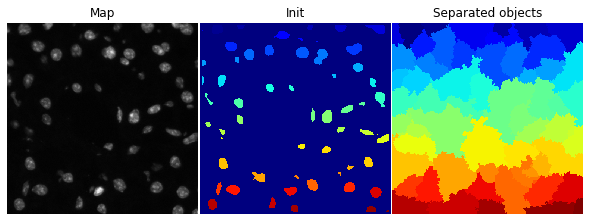

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import mahotas as mh

import skimage
from skimage.data import imread
from skimage.morphology import watershed
from skimage.color import rgb2gray

#img = imread(r'C:\Users\Mo\OneDrive\Notes\OBI\CV-Images\Images_Data\DL_CellSeg\Mouse_DAPI\BA85_DAPI.tif')
# cropped image
img = imread(r'C:\Users\Mo\OneDrive\Notes\OBI\CV-Images\Image Functions & Tutorials\ImageBreaker\tiles_output\BK71_DAPI_tile-x0y0.png')

g_filter = mh.gaussian_filter(img, 2.); g_mean = g_filter.mean(); bin_image = g_filter > g_mean

seeds, n_seeds = nd.label(nd.binary_erosion(bin_image, iterations=5) )

labels = watershed(-img, seeds)

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.7))
ax0, ax1, ax2 = axes

ax0.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title('Map')
ax1.imshow(seeds, cmap=plt.cm.jet, interpolation='nearest')
ax1.set_title('Init')
ax2.imshow(labels, cmap=plt.cm.jet, interpolation='nearest')
ax2.set_title('Separated objects')

for ax in axes:
    ax.axis('off')

fig.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,
                    right=1)

In [ ]:
plt.savefig('good.png')